# Artificial Intelligence Nanodegree
## Machine Translation Project
In this notebook, sections that end with **'(IMPLEMENTATION)'** in the header indicate that the following blocks of code will require additional functionality which you must provide. Please be sure to read the instructions carefully!

## Introduction
In this notebook, you will build a deep neural network that functions as part of an end-to-end machine translation pipeline. Your completed pipeline will accept English text as input and return the French translation.

- **Preprocess** - You'll convert text to sequence of integers.
- **Models** Create models which accepts a sequence of integers as input and returns a probability distribution over possible translations. After learning about the basic types of neural networks that are often used for machine translation, you will engage in your own investigations, to design your own model!
- **Prediction** Run the model on English text.

## Dataset
We begin by investigating the dataset that will be used to train and evaluate your pipeline.  The most common datasets used for machine translation are from [WMT](http://www.statmt.org/).  However, that will take a long time to train a neural network on.  We'll be using a dataset we created for this project that contains a small vocabulary.  You'll be able to train your model in a reasonable time with this dataset.
### Load Data
The data is located in `data/small_vocab_en` and `data/small_vocab_fr`. The `small_vocab_en` file contains English sentences with their French translations in the `small_vocab_fr` file. Load the English and French data from these files from running the cell below.

In [1]:
from IPython.core.display import display, HTML

def make_page_wide():
    display(HTML("<style>.container { width:100% !important; }</style>"))

make_page_wide()

In [2]:
import helper

import keras

# Load English data
english_sentences = helper.load_data('data/small_vocab_en')
# Load French data
french_sentences = helper.load_data('data/small_vocab_fr')

#print(french_sentences[0:5])
print('Dataset Loaded')

Using TensorFlow backend.


Dataset Loaded


### Files
Each line in `small_vocab_en` contains an English sentence with the respective translation in each line of `small_vocab_fr`.  View the first two lines from each file.

In [3]:
for sample_i in range(2):
    print('small_vocab_en Line {}:  {}'.format(sample_i + 1, english_sentences[sample_i]))
    print('small_vocab_fr Line {}:  {}'.format(sample_i + 1, french_sentences[sample_i]))

small_vocab_en Line 1:  new jersey is sometimes quiet during autumn , and it is snowy in april .
small_vocab_fr Line 1:  new jersey est parfois calme pendant l' automne , et il est neigeux en avril .
small_vocab_en Line 2:  the united states is usually chilly during july , and it is usually freezing in november .
small_vocab_fr Line 2:  les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .


From looking at the sentences, you can see they have been preprocessed already.  The puncuations have been delimited using spaces. All the text have been converted to lowercase.  This should save you some time, but the text requires more preprocessing.
### Vocabulary
The complexity of the problem is determined by the complexity of the vocabulary.  A more complex vocabulary is a more complex problem.  Let's look at the complexity of the dataset we'll be working with.

In [4]:
import collections


english_words_counter = collections.Counter([word for sentence in english_sentences for word in sentence.split()])
french_words_counter = collections.Counter([word for sentence in french_sentences for word in sentence.split()])

print('{} English words.'.format(len([word for sentence in english_sentences for word in sentence.split()])))
print('{} unique English words.'.format(len(english_words_counter)))
print('10 Most common words in the English dataset:')
print('"' + '" "'.join(list(zip(*english_words_counter.most_common(10)))[0]) + '"')
print()
print('{} French words.'.format(len([word for sentence in french_sentences for word in sentence.split()])))
print('{} unique French words.'.format(len(french_words_counter)))
print('10 Most common words in the French dataset:')
print('"' + '" "'.join(list(zip(*french_words_counter.most_common(10)))[0]) + '"')

1823250 English words.
227 unique English words.
10 Most common words in the English dataset:
"is" "," "." "in" "it" "during" "the" "but" "and" "sometimes"

1961295 French words.
355 unique French words.
10 Most common words in the French dataset:
"est" "." "," "en" "il" "les" "mais" "et" "la" "parfois"


For comparison, _Alice's Adventures in Wonderland_ contains 2,766 unique words of a total of 15,500 words.
## Preprocess
For this project, you won't use text data as input to your model. Instead, you'll convert the text into sequences of integers using the following preprocess methods:
1. Tokenize the words into ids
2. Add padding to make all the sequences the same length.

Time to start preprocessing the data...
### Tokenize (IMPLEMENTATION)
For a neural network to predict on text data, it first has to be turned into data it can understand. Text data like "dog" is a sequence of ASCII character encodings.  Since a neural network is a series of multiplication and addition operations, the input data needs to be number(s).

We can turn each character into a number or each word into a number.  These are called character and word ids, respectively.  Character ids are used for character level models that generate text predictions for each character.  A word level model uses word ids that generate text predictions for each word.  Word level models tend to learn better, since they are lower in complexity, so we'll use those.

Turn each sentence into a sequence of words ids using Keras's [`Tokenizer`](https://keras.io/preprocessing/text/#tokenizer) function. Use this function to tokenize `english_sentences` and `french_sentences` in the cell below.

Running the cell will run `tokenize` on sample data and show output for debugging.

In [5]:
import project_tests as tests
from keras.preprocessing.text import Tokenizer


def tokenize(x):
    """
    Tokenize x
    :param x: List of sentences/strings to be tokenized
    :return: Tuple of (tokenized x data, tokenizer used to tokenize x)
    """
    # TODO: Implement
    
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(x)
    #print(tokenizer.word_index)
    sequences = tokenizer.texts_to_sequences(x)
    
    return sequences, tokenizer

tests.test_tokenize(tokenize)

# Tokenize Example output
text_sentences = [
    'The quick brown fox jumps over the lazy dog .',
    'By Jove , my quick study of lexicography won a prize .',
    'This is a short sentence .']
text_tokenized, text_tokenizer = tokenize(text_sentences)
print(text_tokenizer.word_index)
print()
for sample_i, (sent, token_sent) in enumerate(zip(text_sentences, text_tokenized)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(sent))
    print('  Output: {}'.format(token_sent))

{'sentence': 21, 'brown': 4, 'jumps': 6, 'is': 19, 'of': 14, 'quick': 2, 'fox': 5, 'short': 20, 'won': 16, 'dog': 9, 'my': 12, 'a': 3, 'by': 10, 'this': 18, 'the': 1, 'study': 13, 'lexicography': 15, 'over': 7, 'prize': 17, 'jove': 11, 'lazy': 8}

Sequence 1 in x
  Input:  The quick brown fox jumps over the lazy dog .
  Output: [1, 2, 4, 5, 6, 7, 1, 8, 9]
Sequence 2 in x
  Input:  By Jove , my quick study of lexicography won a prize .
  Output: [10, 11, 12, 2, 13, 14, 15, 16, 3, 17]
Sequence 3 in x
  Input:  This is a short sentence .
  Output: [18, 19, 3, 20, 21]


### Padding (IMPLEMENTATION)
When batching the sequence of word ids together, each sequence needs to be the same length.  Since sentences are dynamic in length, we can add padding to the end of the sequences to make them the same length.

Make sure all the English sequences have the same length and all the French sequences have the same length by adding padding to the **end** of each sequence using Keras's [`pad_sequences`](https://keras.io/preprocessing/sequence/#pad_sequences) function.

In [6]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences


def pad(x, length=None):
    """
    Pad x
    :param x: List of sequences.
    :param length: Length to pad the sequence to.  If None, use length of longest sequence in x.
    :return: Padded numpy array of sequences
    """
    # TODO: Implement
    padded_ar = pad_sequences(x, maxlen=length, padding='post', truncating='post')
#     print(padded_ar)
    return padded_ar
tests.test_pad(pad)

# Pad Tokenized output
test_pad = pad(text_tokenized)
for sample_i, (token_sent, pad_sent) in enumerate(zip(text_tokenized, test_pad)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(np.array(token_sent)))
    print('  Output: {}'.format(pad_sent))

Sequence 1 in x
  Input:  [1 2 4 5 6 7 1 8 9]
  Output: [1 2 4 5 6 7 1 8 9 0]
Sequence 2 in x
  Input:  [10 11 12  2 13 14 15 16  3 17]
  Output: [10 11 12  2 13 14 15 16  3 17]
Sequence 3 in x
  Input:  [18 19  3 20 21]
  Output: [18 19  3 20 21  0  0  0  0  0]


### Preprocess Pipeline
Your focus for this project is to build neural network architecture, so we won't ask you to create a preprocess pipeline.  Instead, we've provided you with the implementation of the `preprocess` function.

In [7]:
print(english_sentences[1])
print(french_sentences[1])

the united states is usually chilly during july , and it is usually freezing in november .
les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .


In [8]:
def preprocess(x, y):
    """
    Preprocess x and y
    :param x: Feature List of sentences
    :param y: Label List of sentences
    :return: Tuple of (Preprocessed x, Preprocessed y, x tokenizer, y tokenizer)
    """
    preprocess_x, x_tk = tokenize(x)
    preprocess_y, y_tk = tokenize(y)

    
    preprocess_x = pad(preprocess_x)
    preprocess_y = pad(preprocess_y)

    # Keras's sparse_categorical_crossentropy function requires the labels to be in 3 dimensions
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)

    return preprocess_x, preprocess_y, x_tk, y_tk

preproc_english_sentences, preproc_french_sentences, english_tokenizer, french_tokenizer =\
    preprocess(english_sentences, french_sentences)


print('Data Preprocessed')

Data Preprocessed


In [9]:
# tmp_x = None
# tmp_y = None
tmp_x, tmp_x_tk = tokenize(english_sentences)
tmp_y, tmp_y_tk = tokenize(french_sentences)


In [10]:
print(english_sentences[1])
print(french_sentences[1])

#import sys
#print(sys.version)

print(preproc_english_sentences.shape)
print(preproc_french_sentences.shape)

#print(preproc_english_sentences[0])
#print(preproc_french_sentences[1])


max_len_e, idx_max_len_e = max([ (len(s), index) for (index,s) in enumerate(tmp_x)])
max_len_f, idx_max_len_f = max([ (len(s), index) for (index,s) in enumerate(tmp_y)])

print("longest english sentence: len={max_len_e}, idx={idx_max_len_e}".format(max_len_e=max_len_e, idx_max_len_e=idx_max_len_e))
print(tmp_x[idx_max_len_e])
print(english_sentences[idx_max_len_e])
print(french_sentences[idx_max_len_e])

print("longest frenech sentence: len={max_len_f}, idx={idx_max_len_f}".format(max_len_f=max_len_f, idx_max_len_f=idx_max_len_f))
print(tmp_y[idx_max_len_f])
print(english_sentences[idx_max_len_f])
print(french_sentences[idx_max_len_f])

the united states is usually chilly during july , and it is usually freezing in november .
les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .
(137861, 15)
(137861, 21, 1)
longest english sentence: len=15, idx=137834
[5, 20, 21, 1, 9, 62, 4, 36, 6, 3, 1, 10, 65, 2, 48]
the united states is usually chilly during january , but it is never wet in february .
les états-unis est généralement froid en janvier , mais il est jamais humide en février .
longest frenech sentence: len=21, idx=123825
[4, 32, 31, 1, 9, 26, 63, 15, 111, 22, 11, 24, 5, 3, 105, 103, 9, 19, 26, 11, 24]
the united states is never dry during autumn , but it is never cold in fall .
les états-unis est jamais à sec au cours de l' automne , mais il ne fait jamais froid à l' automne .


(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.37000000e+02,   1.46000000e+02,   2.59200000e+03,
          2.63750000e+04,   5.12200000e+03,   1.03100000e+03,
          8.04000000e+02,   1.76000000e+02,   3.53500000e+03,
          2.70090000e+04,   3.49130000e+04,   2.99620000e+04,
          6.05800000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Patch objects>)

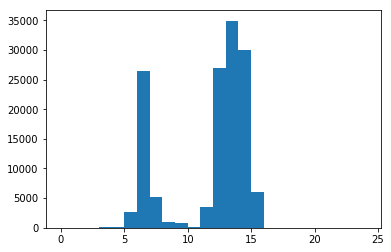

In [11]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

#distribution of length of english senetecens
plt.hist([len(s) for s in tmp_x], bins=range(25))

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.10000000e+01,   1.85000000e+02,   5.64000000e+02,
          4.97300000e+03,   5.41400000e+03,   4.76700000e+03,
          1.51240000e+04,   4.68400000e+03,   3.66000000e+03,
          1.36470000e+04,   2.01280000e+04,   3.18310000e+04,
          2.12290000e+04,   8.01800000e+03,   2.82000000e+03,
          6.75000000e+02,   9.90000000e+01,   8.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Patch objects>)

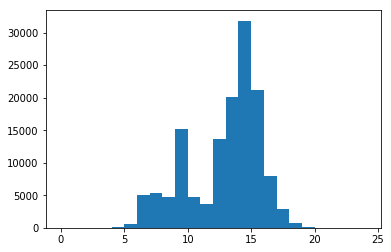

In [12]:
# dsitribution of length of french sentences
plt.hist([len(s) for s in tmp_y], bins=range(25))

## Models
In this section, you will experiment with various neural network architectures.
You will begin by training four relatively simple architectures.
- Model 1 is a simple RNN
- Model 2 is a RNN with Embedding
- Model 3 is a Bidirectional RNN
- Model 4 is an optional Encoder-Decoder RNN

After experimenting with the four simple architectures, you will construct a deeper architecture that is designed to outperform all four models.
### Ids Back to Text
The neural network will be translating the input to words ids, which isn't the final form we want.  We want the French translation.  The function `logits_to_text` will bridge the gab between the logits from the neural network to the French translation.  You'll be using this function to better understand the output of the neural network.

In [13]:
def logits_to_text(logits, tokenizer):
    """
    Turn logits from a neural network into text using the tokenizer
    :param logits: Logits from a neural network
    :param tokenizer: Keras Tokenizer fit on the labels
    :return: String that represents the text of the logits
    """
    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = '<PAD>'

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

print('`logits_to_text` function loaded.')

`logits_to_text` function loaded.


In [20]:
import random


def print_translations(model, x, y, y_tk, how_many=5, indexes=[]):
    try:
        how_many = int(how_many)
    except ValueError:
        how_many = 5
        
    if type(indexes)!=list or len(indexes)==0:
        indexes = random.sample(range(1, len(x)), how_many)
        
    for idx in indexes:
        print("english: {}".format(x[idx]))
        predictions = model.predict(y[idx:idx+1])
        # prediciton.shape = (1,seq_length, logits)
        # print(predictions.shape[0])
        for prediction_idx in range(predictions.shape[0]):
            print("french:  {pred}".format(prediction_idx=prediction_idx, pred=logits_to_text(predictions[prediction_idx], y_tk)))
        print()
    

In [15]:
from keras.callbacks import ModelCheckpoint

def create_checkpoint_callback(filename):
    return ModelCheckpoint(filename, monitor='val_acc', verbose=1, save_best_only=True)

### Model 1: RNN (IMPLEMENTATION)
![RNN](images/rnn.png)
A basic RNN model is a good baseline for sequence data.  In this model, you'll build a RNN that translates English to French.

In [18]:
from keras.layers import GRU, Input, Dense, TimeDistributed
from keras.models import Model
from keras.layers import Activation
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy


def simple_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a basic RNN on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Build the layers
    print("input_shape={}".format(input_shape))
    print("output_sequence_length={}".format(output_sequence_length))
    print("english_vocab_size={}".format(english_vocab_size))
    print("french_vocab_size={}".format(french_vocab_size))
    
    
    input_sequences = Input(shape=(21,1), name='input_layer')
    
    #gru = GRU(units=french_vocab_size+1, return_sequences=True, name='gru_layer')(input_sequences)
    #predictions = TimeDistributed(Dense(units=french_vocab_size+1, input_shape=(21,french_vocab_size+1), name='dense_td'), name='time_distributed')(gru)
    #model = Model(inputs = input_sequences, outputs=predictions)
    
    #gru = GRU(units=french_vocab_size+1, return_sequences=True, name='gru_layer')(input_sequences)
    gru = GRU(units=100, return_sequences=True, name='gru_layer')(input_sequences)
    #predictions = TimeDistributed(Dense(units=french_vocab_size+1, input_shape=(21,french_vocab_size+1), name='dense_td'), name='time_distributed')(gru)
    predictions=Dense(french_vocab_size, activation='softmax', name='prediction_layer')(gru)
    model = Model(inputs = input_sequences, outputs=predictions)
    
    print( model.summary())
    
    learning_rate=0.2
    model.compile(loss=sparse_categorical_crossentropy,
                 optimizer=Adam(learning_rate),
                 metrics=['accuracy'])
#     print( model.summary())
    return model

tests.test_simple_model(simple_model)



input_shape=(137861, 21, 1)
output_sequence_length=21
english_vocab_size=199
french_vocab_size=344
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 21, 1)             0         
_________________________________________________________________
gru_layer (GRU)              (None, 21, 100)           30600     
_________________________________________________________________
prediction_layer (Dense)     (None, 21, 344)           34744     
Total params: 65,344
Trainable params: 65,344
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
# Reshaping the input to work with a basic RNN
tmp_x = pad(preproc_english_sentences, preproc_french_sentences.shape[1])
tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2], 1))

#print(tmp_x[2,])
print("shape of y: {}".format(preproc_french_sentences.shape))
# Train the neural network
simple_rnn_model = simple_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index),
    len(french_tokenizer.word_index))
simple_rnn_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, epochs=10, validation_split=0.2, callbacks=[create_checkpoint_callback('model_simple.hdf5')])

# Print prediction(s)
print(english_sentences[0])
print(logits_to_text(simple_rnn_model.predict(tmp_x[:1])[0], french_tokenizer))

shape of y: (137861, 21, 1)
input_shape=(137861, 21, 1)
output_sequence_length=21
english_vocab_size=199
french_vocab_size=344
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 21, 1)             0         
_________________________________________________________________
gru_layer (GRU)              (None, 21, 100)           30600     
_________________________________________________________________
prediction_layer (Dense)     (None, 21, 344)           34744     
Total params: 65,344
Trainable params: 65,344
Non-trainable params: 0
_________________________________________________________________
None
Train on 110288 samples, validate on 27573 samples
Epoch 1/10
110288/110288 [==============================] - 11s - loss: 3.5651 - acc: 0.5235 - val_loss: nan - val_acc: 0.5850
Epoch 2/10
110288/110288 [==============================] - 7s - loss: 2.9971 - acc: 0.5844 

In [22]:
print_translations(simple_rnn_model, english_sentences, tmp_x, french_tokenizer)

english: his least liked fruit is the lime , but your least liked is the grapefruit .
french:  les préféré aimé aimé aimé la la mais l' aimé aimé est la <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: the united states is busy during autumn , and it is never chilly in june .
french:  la unis unis est occupé en mois et il est jamais jamais en jamais <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: india is sometimes hot during december , but it is usually quiet in fall .
french:  new est parfois parfois en en mais mais mais est est en l' janvier <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: the united states is never hot during summer , and it is usually warm in autumn .
french:  la unis unis est jamais jamais en mois et il est est est en en <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: she dislikes lemons , pears , and grapes .
french:  la les les les les et et les <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>



### Model 2: Embedding (IMPLEMENTATION)
![RNN](images/embedding.png)
You've turned the words into ids, but there's a better representation of a word.  This is called word embeddings.  An embedding is a vector representation of the word that is close to similar words in n-dimensional space, where the n represents the size of the embedding vectors.

In this model, you'll create a RNN model using embedding.

In [25]:
from keras.layers.embeddings import Embedding
from keras.models import Sequential

def embed_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a RNN model using word embedding on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Implement
    print("input_shape={}".format(input_shape))
    print("output_sequence_length={}".format(output_sequence_length))
    print("english_vocab_size={}".format(english_vocab_size))
    print("french_vocab_size={}".format(french_vocab_size))

    dim_embedding = 64
    gru_hidden_state_dim = french_vocab_size
    
    model=Sequential()
    model.add(Embedding(input_dim=english_vocab_size, output_dim=dim_embedding, input_length=input_shape[-1], name='embedding_layer' ))
    model.add(GRU(units=gru_hidden_state_dim, return_sequences=True, name='gru_layer'))
    model.add(Dense(french_vocab_size, activation='softmax', name='clasification_layer'))
    
    learning_rate = 0.2
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

tests.test_embed_model(embed_model)

input_shape=(137861, 21)
output_sequence_length=21
english_vocab_size=199
french_vocab_size=344
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 21, 64)            12736     
_________________________________________________________________
gru_layer (GRU)              (None, 21, 344)           422088    
_________________________________________________________________
clasification_layer (Dense)  (None, 21, 344)           118680    
Total params: 553,504
Trainable params: 553,504
Non-trainable params: 0
_________________________________________________________________
None


In [26]:

tmp_x = pad(preproc_english_sentences, preproc_french_sentences.shape[1])

# Train the neural network
embed_rnn_model = embed_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index)+1,
    len(french_tokenizer.word_index)+1)

embed_rnn_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, callbacks=[create_checkpoint_callback('model_embed.hdf5')], epochs=10, validation_split=0.2)


input_shape=(137861, 21)
output_sequence_length=21
english_vocab_size=200
french_vocab_size=345
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 21, 64)            12800     
_________________________________________________________________
gru_layer (GRU)              (None, 21, 345)           424350    
_________________________________________________________________
clasification_layer (Dense)  (None, 21, 345)           119370    
Total params: 556,520
Trainable params: 556,520
Non-trainable params: 0
_________________________________________________________________
None
Train on 110288 samples, validate on 27573 samples
Epoch 1/10
110288/110288 [==============================] - 16s - loss: 15.7099 - acc: 0.0171 - val_loss: 15.8917 - val_acc: 0.0140
Epoch 2/10
110288/110288 [==============================] - 16s - loss: 15.8923 - acc: 0.0140 - val_loss: 15.8917 - 

In [27]:
print_translations(embed_rnn_model, english_sentences, tmp_x, french_tokenizer)

english: india is sometimes cold during september , and it is rainy in summer .
french:  france france humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide

english: the united states is rainy during july , and it is wet in winter .
french:  france france humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide

english: she went to india last spring .
french:  elle france humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide

english: france is usually freezing during july , but it is usually mild in winter .
french:  france france humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide humide

english: has she been to china ?
french:  à gèle gèle france france humide humide humide hum

### Model 3: Bidirectional RNNs (IMPLEMENTATION)
![RNN](images/bidirectional.png)
One restriction of a RNN is that it can't see the future input, only the past.  This is where bidirectional recurrent neural networks come in.  They are able to see the future data.

In [32]:
from keras.layers import Bidirectional
from keras.layers import Reshape


def bd_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a bidirectional RNN model on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Implement
    
    print("input_shape={}".format(input_shape))
    print("output_sequence_length={}".format(output_sequence_length))
    print("english_vocab_size={}".format(english_vocab_size))
    print("french_vocab_size={}".format(french_vocab_size))
    print("switching to input size={}".format(input_shape[1]))
    dim_embedding = 64
    
    model=Sequential()
    model.add(Reshape(target_shape=(input_shape[1],), input_shape= input_shape[1:], name='reshape_layer' ))
    model.add(Embedding(input_dim=english_vocab_size, output_dim=dim_embedding, input_length=21, name='embedding_layer' ))
    
    model.add(Bidirectional(GRU(output_sequence_length, return_sequences=True, name='gru_layer'), name='bidi_gru', merge_mode='concat'))
    model.add(Dense(units=french_vocab_size, activation='softmax', name='clasification_layer'))
    
    learning_rate = 0.2
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    
    #model.compile(optimizer='rmsprop', loss='mse')
    # print(model.summary())
    return model

tests.test_bd_model(bd_model)

# TODO: Train and Print prediction(s)
# Reshaping the input to work with a basic RNN
tmp_x = pad(preproc_english_sentences, preproc_french_sentences.shape[1])
#tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2], 1))

# Train the neural network
bd_rnn_model = bd_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index)+1,
    len(french_tokenizer.word_index)+1)

print(bd_rnn_model.summary())

input_shape=(137861, 21, 1)
output_sequence_length=21
english_vocab_size=199
french_vocab_size=344
switching to input size=21
input_shape=(137861, 21)
output_sequence_length=21
english_vocab_size=200
french_vocab_size=345
switching to input size=21
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_layer (Reshape)      (None, 21)                0         
_________________________________________________________________
embedding_layer (Embedding)  (None, 21, 64)            12800     
_________________________________________________________________
bidi_gru (Bidirectional)     (None, 21, 42)            10836     
_________________________________________________________________
clasification_layer (Dense)  (None, 21, 345)           14835     
Total params: 38,471
Trainable params: 38,471
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
bd_rnn_model.load_weights('model_rnn.hdf5')

In [ ]:
bd_rnn_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, epochs=10, validation_split=0.2, callbacks=[create_checkpoint_callback('model_rnn.hdf5')])

# Print prediction(s)
print(logits_to_text(bd_rnn_model.predict(tmp_x[:1])[0], french_tokenizer))

In [34]:
print_translations(bd_rnn_model, english_sentences, tmp_x, french_tokenizer)

english: new jersey is sometimes relaxing during autumn , and it is chilly in summer .
french:  new jersey est parfois relaxant au l' et il il est en été <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: it's easy to translate spanish to portuguese .
french:  est est de de traduire juillet printemps <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: we dislike lemons , oranges , and apples .
french:  nous détestons les les les bananes <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: china is sometimes nice during may , and it is sometimes relaxing in winter .
french:  chine est parfois agréable en mois hiver mais mais il est en hiver <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: india is never pleasant during spring , but it is never mild in march .
french:  l' inde est jamais en au mais il il jamais doux en en <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>



### Model 4: Encoder-Decoder (OPTIONAL)
Time to look at encoder-decoder models.  This model is made up of an encoder and decoder. The encoder creates a matrix representation of the sentence.  The decoder takes this matrix as input and predicts the translation as output.

Create an encoder-decoder model in the cell below.

In [35]:
from keras.layers import RepeatVector
from keras.layers import LSTM

def encdec_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train an encoder-decoder model on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    print("input_shape={}".format(input_shape))
    print("output_sequence_length={}".format(output_sequence_length))
    print("english_vocab_size={}".format(english_vocab_size))
    print("french_vocab_size={}".format(french_vocab_size))
    print("switching to input size={}".format(input_shape[1]))
    
    # hyper-parameters
    dim_embed = 1000
    dim_hidden = 100
    learning_rate = 0.1
    
    # OPTIONAL: Implement
    model = Sequential()
    
    # build encoder network
    model.add(Reshape(target_shape=(input_shape[1],), input_shape= input_shape[1:], name='reshape_layer' ))
    model.add(Embedding(english_vocab_size, dim_embed, input_shape=input_shape[2:], mask_zero=True, name='embedding_layer'))
    model.add(LSTM(dim_hidden, name='lstm_encoder_layer'))
    model.add(RepeatVector(output_sequence_length, name='repeat_layer'))
    
    # decoder network
    model.add(LSTM(french_vocab_size, return_sequences=True, name='lstm_decoder_layer'))
    model.add(TimeDistributed(Dense(french_vocab_size, name='td_dense')))
    model.add(Activation('softmax'))
    
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model


tests.test_encdec_model(encdec_model)


# OPTIONAL: Train and Print prediction(s)
# Reshaping the input to work with a basic RNN
tmp_x = pad(preproc_english_sentences, preproc_french_sentences.shape[1])
print("shape of tmp_x: {}".format(tmp_x.shape))
#tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2], 1))


# Train the neural network
encdec_model = encdec_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index)+1,
    len(french_tokenizer.word_index)+1)

print(encdec_model.summary())


input_shape=(137861, 15, 1)
output_sequence_length=21
english_vocab_size=199
french_vocab_size=344
switching to input size=15
shape of tmp_x: (137861, 21)
input_shape=(137861, 21)
output_sequence_length=21
english_vocab_size=200
french_vocab_size=345
switching to input size=21
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_layer (Reshape)      (None, 21)                0         
_________________________________________________________________
embedding_layer (Embedding)  (None, 21, 1000)          200000    
_________________________________________________________________
lstm_encoder_layer (LSTM)    (None, 100)               440400    
_________________________________________________________________
repeat_layer (RepeatVector)  (None, 21, 100)           0         
_________________________________________________________________
lstm_decoder_layer (LSTM)    (None, 21, 345)           615480 

In [42]:
try:
    encdec_model.load_weights('model_simple.hdf5')
except OSError:
    print('model needs trainig')
except ValueError:
    print('different model, needs training')

different model, needs training


In [43]:

encdec_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, epochs=10, validation_split=0.2, callbacks=[create_checkpoint_callback('model_encdec')])

# Print prediction(s)
print(logits_to_text(encdec_model.predict(tmp_x[:1])[0], french_tokenizer))

Train on 110288 samples, validate on 27573 samples
Epoch 1/10
110288/110288 [==============================] - 44s - loss: 2.8421 - acc: 0.4631 - val_loss: 2.1083 - val_acc: 0.5307
Epoch 2/10
110288/110288 [==============================] - 43s - loss: 1.9673 - acc: 0.5471 - val_loss: 1.8810 - val_acc: 0.5615
Epoch 3/10
110288/110288 [==============================] - 43s - loss: 1.7669 - acc: 0.5718 - val_loss: 1.6937 - val_acc: 0.5835
Epoch 4/10
110288/110288 [==============================] - 43s - loss: 1.6698 - acc: 0.5839 - val_loss: 1.6433 - val_acc: 0.5844
Epoch 5/10
110288/110288 [==============================] - 43s - loss: 1.6523 - acc: 0.5826 - val_loss: 1.7105 - val_acc: 0.5785
Epoch 6/10
110288/110288 [==============================] - 43s - loss: 1.6938 - acc: 0.5702 - val_loss: 1.6749 - val_acc: 0.5702
Epoch 7/10
110288/110288 [==============================] - 43s - loss: 1.6190 - acc: 0.5792 - val_loss: 1.6132 - val_acc: 0.5798
Epoch 8/10
110288/110288 [=============

In [44]:
# test some translations
print_translations(encdec_model, english_sentences, tmp_x, french_tokenizer)


english: the united states is usually mild during march , but it is never dry in december .
french:  new est est généralement en en en il il est neigeux en décembre décembre <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: india is usually rainy during fall , but it is usually nice in august .
french:  l' est est parfois en en en mais il généralement généralement généralement généralement août <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: the apple is his least favorite fruit , but the mango is their least favorite .
french:  la pêche est son fruit préféré moins mais la fraise est son moins préféré <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: he drives the little green truck .
french:  il conduit le camion camion camion <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: france is usually quiet during summer , and it is sometimes snowy in october .
french:  paris est est est en en et et il est est en octobre <PAD> <PAD> <P

### Model 5: Custom (IMPLEMENTATION)
Use everything you learned from the previous models to create a model that incorporates embedding and a bidirectional rnn into one model.

In [ ]:
from keras.models import Sequential
from keras.layers import RepeatVector, Dense, Reshape, Embedding, TimeDistributed, Activation, Dropout
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

    
def model_final(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train an encoder-decoder model on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    print("input_shape={}".format(input_shape))
    print("output_sequence_length={}".format(output_sequence_length))
    print("english_vocab_size={}".format(english_vocab_size))
    print("french_vocab_size={}".format(french_vocab_size))
    print("switching to input size={}".format(input_shape[1]))
    
    # hyper-parameters
    dim_embed = 100
    dim_hidden = 100
    learning_rate = 0.1
    hyper_dropout = 0.25
    
    # OPTIONAL: Implement
    model = Sequential()
   
    # build encoder network
    #model.add(Reshape(target_shape=(input_shape[1],1), input_shape= input_shape[1:], name='reshape_layer' ))
    model.add(Embedding(english_vocab_size, dim_embed, input_shape=input_shape[1:], mask_zero=True, name='embedding_layer'))
    #model.add(LSTM(dim_hidden, name='lstm_encoder_layer'))
    #model.add(RepeatVector(output_sequence_length, name='repeat_layer'))
    #model.add(TimeDistributed(GRU(units=output_sequence_length, return_sequences=True), name='bidi_gru_encoder'))
    
    # decoder network
    #model.add(LSTM(french_vocab_size, return_sequences=True, name='lstm_decoder_layer'))
    #model.add(TimeDistributed(GRU(units=output_sequence_length, return_sequences=False)))
    
#     model.add(TimeDistributed(Dense(french_vocab_size, activation="relu", name='td_dense'), name='td_dense_1'))
    #model.add(Dropout(hyper_dropout))
    #model.add(TimeDistributed(Dense(french_vocab_size, activation="relu", name='td_dense'), name='td_dense_2'))
    
    
#     model = Sequential()
    out_dim = 66
    model.add(GRU(10000, input_shape=input_shape, return_sequences=False)) # encoder
    model.add(RepeatVector(output_sequence_length)) # Get the last output of the GRU and repeats it
    model.add(GRU(out_dim, return_sequences=True)) # decoder
    model.add(TimeDistributed(Dense(french_vocab_size, activation='softmax', name='activation_layer')))
    
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    print(model.summary())
    return model
#tests.test_model_final(model_final)



print('Final Model Loaded')
# TODO: Train neural network using model_final
tmp_x = pad(preproc_english_sentences, preproc_english_sentences.shape[-1])

# Train the neural network
final_model = model_final(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index)+1,
    len(french_tokenizer.word_index)+1)

print(final_model.summary())
#print(final_model.summary())

In [ ]:

final_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, epochs=10, validation_split=0.2, callbacks=[create_checkpoint_callback('model_final.hdf5')])



In [109]:
print_translations(final_model, english_sentences, tmp_x, french_tokenizer)

english: california is sometimes hot during august , and it is usually chilly in autumn .
french 0:  la <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: the united states is beautiful during autumn , and it is sometimes dry in july .
french 0:  <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: india is never busy during winter , and it is sometimes nice in autumn .
french 0:  la <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: the peach is their least favorite fruit , but the pear is my least favorite .
french 0:  <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: she dislikes pears , mangoes , and limes .
french 0:  <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 

In [ ]:
# needs
# pip install pydot graphviz
# sudo apt-get install graphviz
%load_ext autoreload
%autoreload 2

%autoreload
import pydot
#print(pydot.find_graphviz())

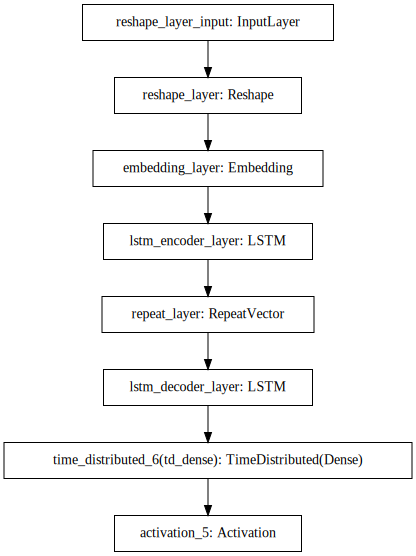

In [35]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(final_model).create(prog='dot', format='svg'))

In [75]:
#import h5py
#final_model.save_weights('model_final.hdf5')

In [57]:
print(preproc_english_sentences.shape)
print(final_model.summary())

(137861, 15)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_layer (Reshape)      (None, 15)                0         
_________________________________________________________________
embedding_layer (Embedding)  (None, 15, 1000)          200000    
_________________________________________________________________
lstm_encoder_layer (LSTM)    (None, 100)               440400    
_________________________________________________________________
repeat_layer (RepeatVector)  (None, 21, 100)           0         
_________________________________________________________________
lstm_decoder_layer (LSTM)    (None, 21, 345)           615480    
_________________________________________________________________
time_distributed_5 (TimeDist (None, 21, 345)           119370    
_________________________________________________________________
activation_5 (Activation)    (None, 21, 345)           0       

## Prediction (IMPLEMENTATION)

In [67]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences


def final_predictions(x, y, x_tk, y_tk):
    """
    Gets predictions using the final model
    :param x: Preprocessed English data
    :param y: Preprocessed French data
    :param x_tk: English tokenizer
    :param y_tk: French tokenizer
    """
    # TODO: Train neural network using model_final
#    tmp_x = pad(x, y.shape[1])

    # Train the neural network
    """
    model = bd_model(
        tmp_x.shape,
        y.shape[1],
        len(x_tk.word_index)+1,
        len(y_tk.word_index)+1)

    model.fit(tmp_x, y, batch_size=1024, epochs=10, validation_split=0.2)
    """
    model=final_model
    
    ## DON'T EDIT ANYTHING BELOW THIS LINE
    y_id_to_word = {value: key for key, value in y_tk.word_index.items()}
    y_id_to_word[0] = '<PAD>'

    sentence = 'he saw a old yellow truck'
    sentence = [x_tk.word_index[word] for word in sentence.split()]
    sentence = pad_sequences([sentence], maxlen=x.shape[-1], padding='post')
    sentences = np.array([sentence[0], x[0]])
    predictions = model.predict(sentences, len(sentences))

    print('Sample 1:')
    print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[0]]))
    print('Il a vu un vieux camion jaune')
    print('Sample 2:')
    print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[1]]))
    print(' '.join([y_id_to_word[np.argmax(x)] for x in y[0]]))


final_predictions(preproc_english_sentences, preproc_french_sentences, english_tokenizer, french_tokenizer)

NameError: name 'final_model' is not defined

## Submission
When you are ready to submit your project, do the following steps:
1. Ensure you pass all points on the [rubric](https://review.udacity.com/#!/rubrics/1004/view).
2. Submit the following in a zip file.
  - `helper.py`
  - `machine_translation.ipynb`
  - `machine_translation.html`
    - You can export the notebook by navigating to **File -> Download as -> HTML (.html)**.